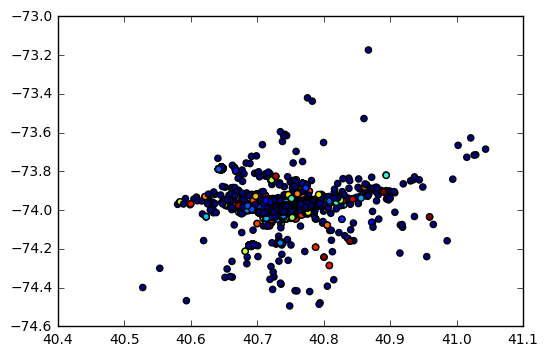

In [23]:
from math import radians, cos, sin, asin, sqrt

from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import pandas as pd


def haversine(lonlat1, lonlat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lat1, lon1 = lonlat1
    lat2, lon2 = lonlat2
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r


#X = pd.read_csv('uber-raw-data-apr14.csv.csv')
X = pd.read_csv('uber-raw-data-apr14.csv')
X = X[['Lat','Lon']].head(10000)
#X = X[1:]
distance_matrix = squareform(pdist(X, (lambda u,v: haversine(u,v))))

db = DBSCAN(eps=0.2, min_samples=2, metric='precomputed')  # using "precomputed" as recommended by @Anony-Mousse
y_db = db.fit_predict(distance_matrix)

X['cluster'] = y_db

plt.scatter(X['Lat'], X['Lon'], c=X['cluster'])
plt.show()

In [9]:
X = pd.read_csv('uber-raw-data-apr14.csv')

In [17]:
x1 = X[['Lat','Lon']]

In [18]:
x1

,Lat,Lon
0,40.7690,-73.9549
1,40.7267,-74.0345
2,40.7316,-73.9873
3,40.7588,-73.9776
4,40.7594,-73.9722
5,40.7383,-74.0403
6,40.7223,-73.9887
7,40.7620,-73.9790
8,40.7524,-73.9960
9,40.7575,-73.9846
